# Titanik Hayata Kalma

## Projenin Amacı

Bu veri seti, Titanik kazasında hayatta kalanları tahmin etmeye yönelik modellerin eğitimi ve performansını değerlendirmek amacıyla kullanılmıştır. Modelin başarısı, hayatta kalanları (Survived 1) ve hayatta kalmayanları (Survived 0) doğru bir şekilde sınıflandırma yeteneği üzerine odaklanmaktadır. Elde edilen sonuçlar, modellerin her iki sınıfta da ne kadar etkili olduğunu göstermektedir. Accuracy score, f1-score, recall ve precision metrikler, modelin her bir sınıf için ne kadar doğru ve eksiksiz tahminler yaptığını ortaya koymaktadır. Bu değerler, modelin performansını anlamak ve geliştirmek için önemli ipuçları sağlamaktadır. Bu dokümantasyon, veri ön işleme, modelin nasıl eğitildiğini, performansının nasıl değerlendirildiğini ve sonuçları açıklamaktadır .

## Projenin Adımları

#### veri tanıma
#### grafikler
#### veri düzeltme
#### veriyi bölme
#### modeller kurma


## Veri Seti Hikayesi


##### Bu veri seti, Titanik gemisinden alınmıştır. Amacı, bir yolcunun kazadan kurtulup kurtulmayacağını çeşitli ölçümlerle tahmin etmektir. Veri setinde şu öznitelikler bulunmaktadır:

##### Pclass: Yolcu sınıfı (1 = Birinci sınıf, 2 = İkinci sınıf, 3 = Üçüncü sınıf)
##### Sex: Cinsiyet (Erkek veya Kadın)
##### Age: Yaş
##### SibSp: Yolcunun gemideki kardeş/eş sayısı
##### Parch: Yolcunun gemideki ebeveyn/çocuk sayısı
##### Fare: Bilet fiyatı
##### Embarked: Yolcunun gemiye bindiği liman (C = Cherbourg, Q = Queenstown, S = Southampton)
##### Survived: Kazadan kurtulanlar (1) veya kurtulamayanlar (0)


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [5]:
print("eğitim setinin ilk 5 satırı: " ,train.head())
print("-"*80)
print("eğitim setinin son 5 satırı: " ,train.tail())

eğitim setinin ilk 5 satırı:     PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            37345

In [6]:
print("boyur sayısı: " ,train.ndim)
print("------------------------------\n")
print("boyut bilgis: " , train.shape)
print("------------------------------\n")
print("değişkenlerin tipi: \n" ,train.dtypes)
print("------------------------------\n")
print("veri setindeki toplam satır sayısı: " ,train.size)

boyur sayısı:  2
------------------------------

boyut bilgis:  (891, 12)
------------------------------

değişkenlerin tipi: 
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
------------------------------

veri setindeki toplam satır sayısı:  10692


In [7]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Grafikler

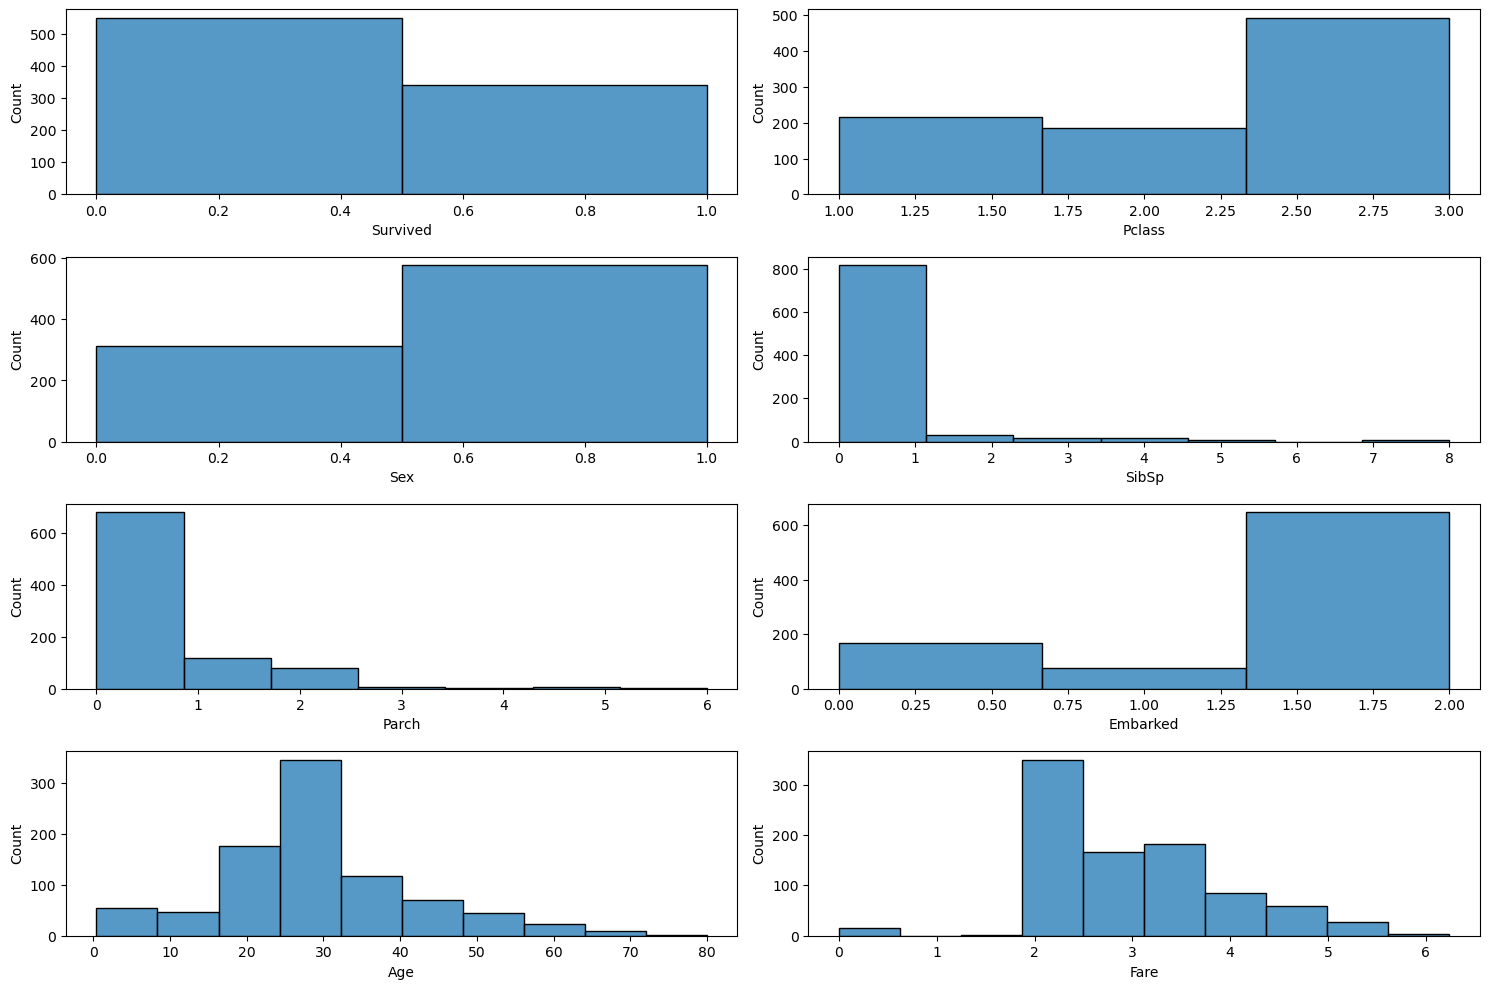

In [123]:
plt.figure(figsize=(15, 10))

plt.subplot(421)
sns.histplot(train.Survived, bins=2, kde=False)
plt.subplot(422)
sns.histplot(train.Pclass, bins=3, kde=False)
plt.subplot(423)
sns.histplot(train.Sex, bins=2, kde=False)
plt.subplot(424)
sns.histplot(train.SibSp, bins=7, kde=False)
plt.subplot(425)
sns.histplot(train.Parch, bins=7, kde=False)
plt.subplot(426)
sns.histplot(train.Embarked, bins=3, kde=False)
plt.subplot(427)
sns.histplot(train.Age, bins=10, kde=False)
plt.subplot(428)
sns.histplot(train.Fare, bins=10, kde=False)

plt.tight_layout()
plt.show()

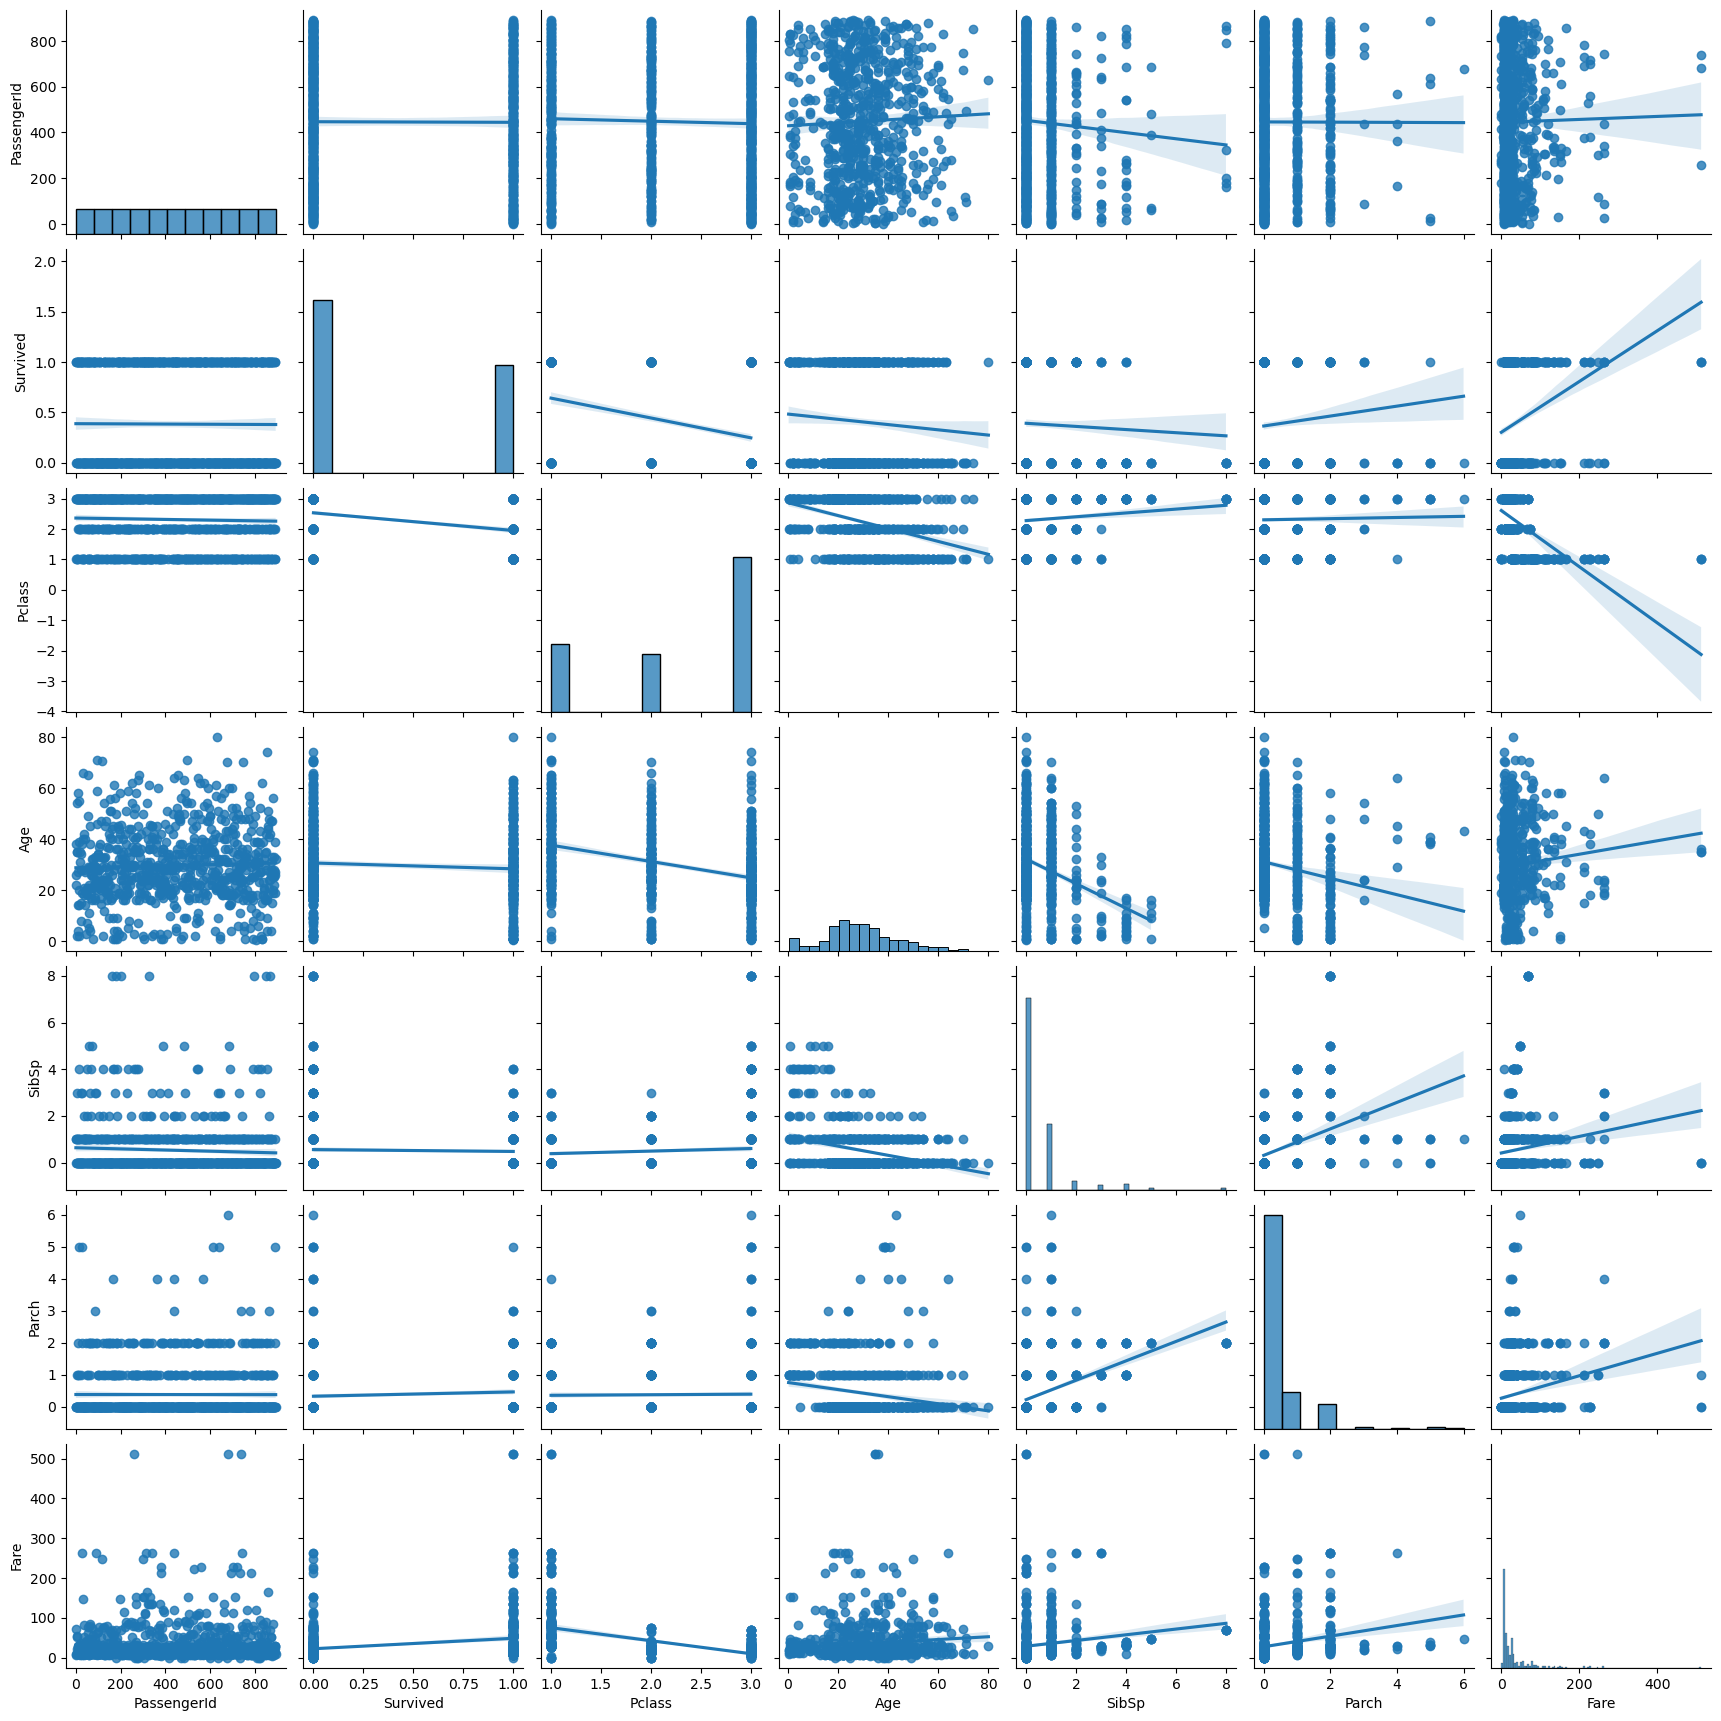

In [22]:
sns.pairplot(train,kind = "reg");

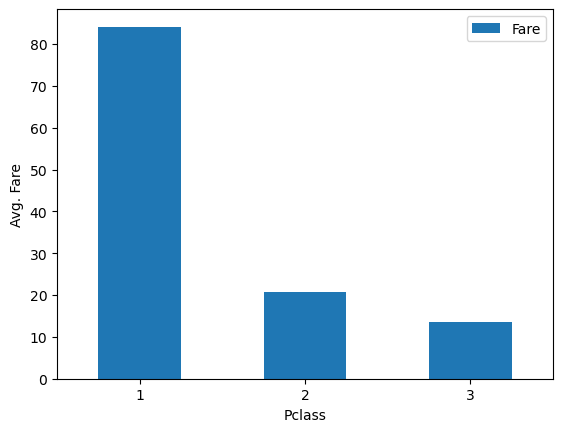

In [23]:
class_fare = train.pivot_table(index='Pclass', values='Fare')
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Avg. Fare')
plt.xticks(rotation=0)
plt.show()

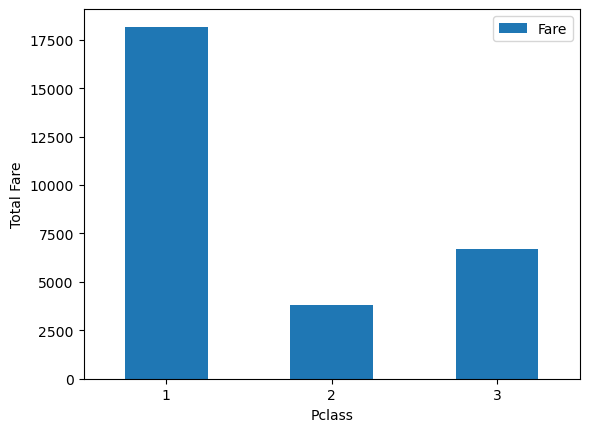

In [24]:
class_fare = train.pivot_table(index='Pclass', values='Fare', aggfunc=np.sum)
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Total Fare')
plt.xticks(rotation=0)
plt.show()



# Data

In [44]:
train_len = len(train)
df = pd.concat([train, test], axis=0)
df = df.reset_index(drop=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

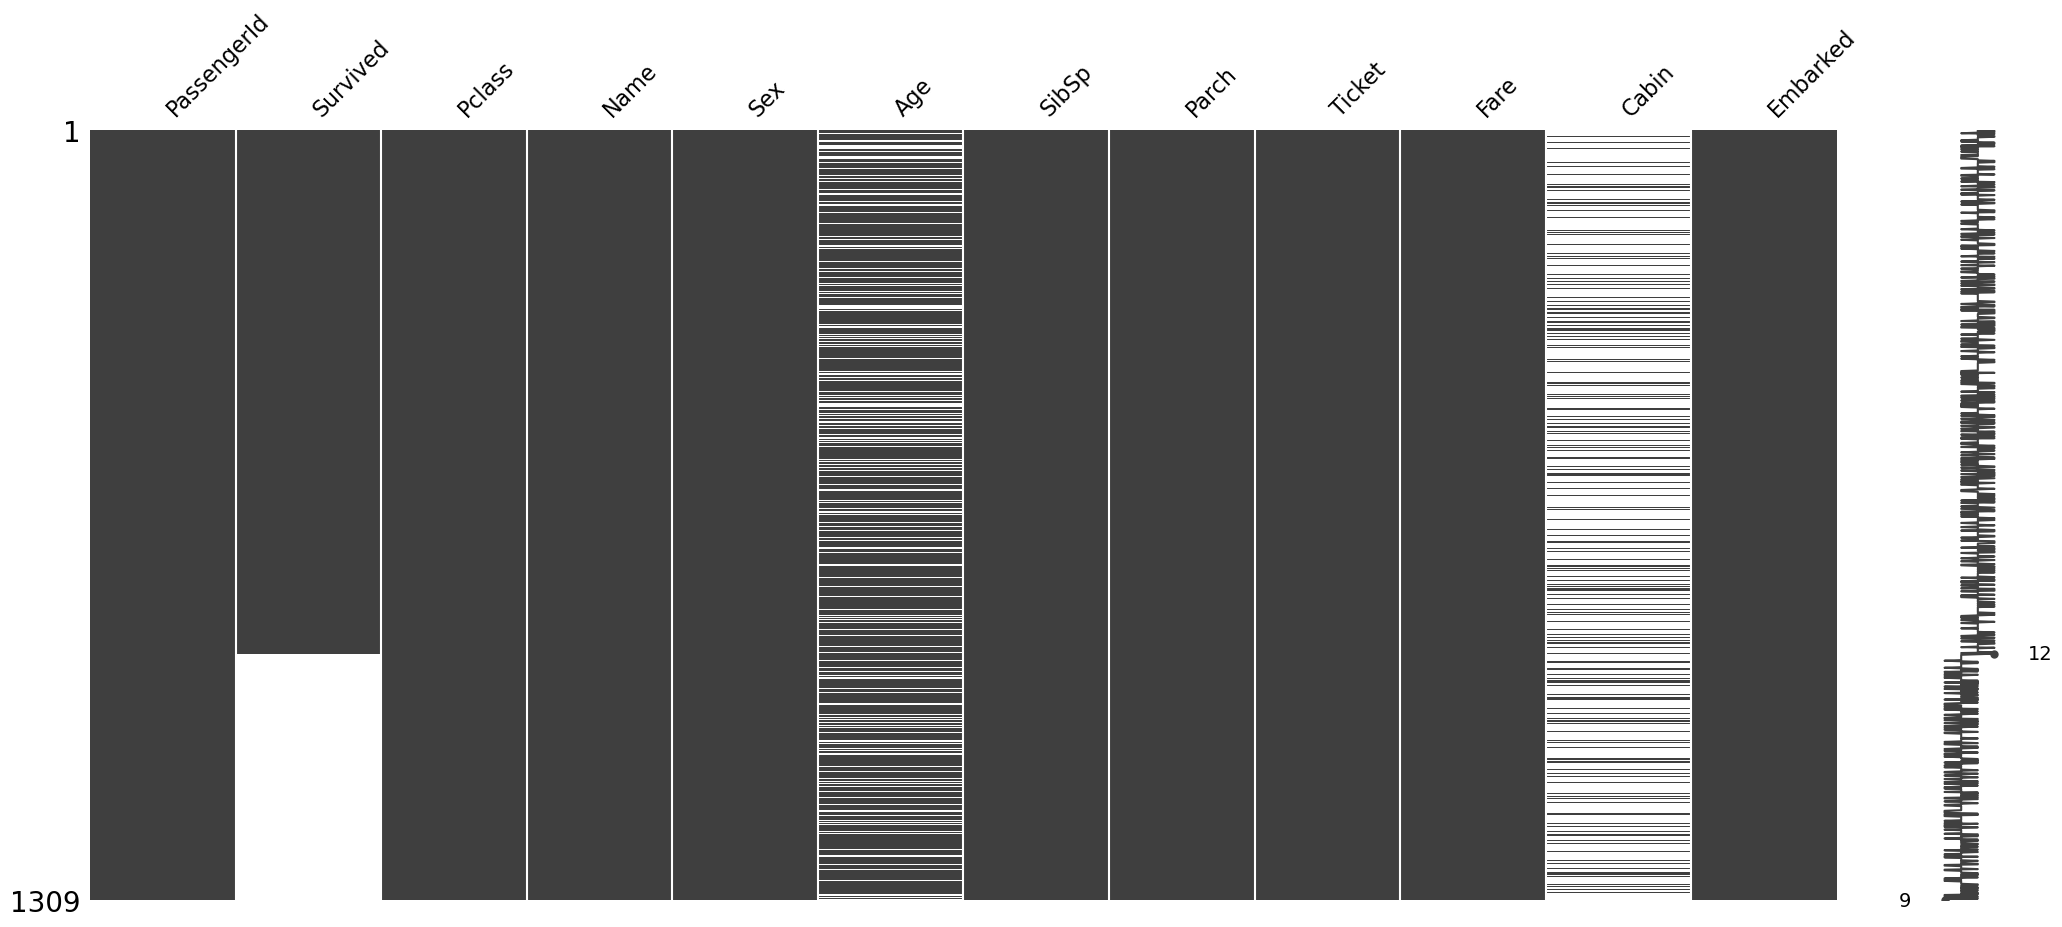

In [45]:
#!pip install missingno
import missingno as msno
msno.matrix(df)

eksik verilerin yapısal nedenlerden dolayı olmadığı anlaşılmıştır

In [46]:
df.isnull().sum()/df.shape[0]*100

PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
dtype: float64

###### cabin değişkeninin %77 boş veri olduğundan silmeyi tercih ediyorum
###### Age ve Fare değişkeninin boş verilerini ortalama ile Embarked değişkeninin boş verilerini mod ile doldurulacak 

In [47]:
df = df.drop(columns = "Cabin")
df["Age"] = df["Age"].fillna(df["Age"].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

<Axes: xlabel='Fare', ylabel='Density'>

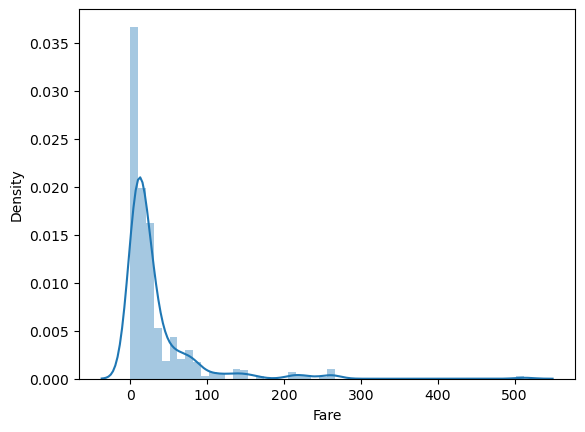

In [48]:
sns.distplot(df['Fare'])


#### Ücret'in '0' dğeri varsa bu bir hatayla sonuçlanacaktır.
#### Bu sorunu çözmek için log dönüşümüne +1 eklemeliyiz.

In [49]:
df['Fare'] = np.log(df['Fare']+1)

In [50]:
df = df.drop(columns=['Name', 'Ticket'], axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.0,1,0,2.110213,S
1,2,1.0,1,female,38.0,1,0,4.280593,C
2,3,1.0,3,female,26.0,0,0,2.188856,S
3,4,1.0,1,female,35.0,1,0,3.990834,S
4,5,0.0,3,male,35.0,0,0,2.202765,S


# Label Encoding


In [51]:
from sklearn.preprocessing import LabelEncoder
cols = ['Sex', 'Embarked']
le = LabelEncoder()

for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,2.110213,2
1,2,1.0,1,0,38.0,1,0,4.280593,0
2,3,1.0,3,0,26.0,0,0,2.188856,2
3,4,1.0,1,0,35.0,1,0,3.990834,2
4,5,0.0,3,1,35.0,0,0,2.202765,2


In [52]:
# datayı train ve test olarak ikiye ayırıyoruz
train = df.iloc[:train_len, :]
test = df.iloc[train_len:, :]

In [53]:
print("eğitim seti: " ,train.head())
print("test seti: ", test.head())

eğitim seti:     PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch      Fare  Embarked
0            1       0.0       3    1  22.0      1      0  2.110213         2
1            2       1.0       1    0  38.0      1      0  4.280593         0
2            3       1.0       3    0  26.0      0      0  2.188856         2
3            4       1.0       1    0  35.0      1      0  3.990834         2
4            5       0.0       3    1  35.0      0      0  2.202765         2
test seti:       PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch      Fare  \
891          892       NaN       3    1  34.5      0      0  2.178064   
892          893       NaN       3    0  47.0      1      0  2.079442   
893          894       NaN       2    1  62.0      0      0  2.369075   
894          895       NaN       3    1  27.0      0      0  2.268252   
895          896       NaN       3    0  22.0      1      1  2.586824   

     Embarked  
891         1  
892         2  
893         1  
894

In [54]:
X = train.drop(columns=['PassengerId', 'Survived'], axis=1)
y = train['Survived']

In [55]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,2.110213,2
1,1,0,38.0,1,0,4.280593,0
2,3,0,26.0,0,0,2.188856,2
3,1,0,35.0,1,0,3.990834,2
4,3,1,35.0,0,0,2.202765,2


# Model Training


In [76]:
from sklearn.model_selection import train_test_split, cross_val_score
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=21)
def classify(model):
    model.fit(x_train, y_train)
    print('Accuracy:', model.score(x_test, y_test))
    
    score = cross_val_score(model, X, y, cv=5)
    print('CV Score:', np.mean(score))

## Random Forests

### Model

In [105]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=21)
classify(rf_model)

Accuracy: 0.8251121076233184
CV Score: 0.8125729709371665


### Model Tuning

In [106]:
rf_params = {'max_depth':[2,5,8,10], #her bir karar ağacının maksimum derinliğini belirler
                'max_features':[2,5,8],# karar ağacının bölünme noktalarında özelliklerin maksimum sayısını belirler. 
                'n_estimators':[100,500,1000,2000],#karar ağacı sayısını belirler
                'min_samples_split':[2,5,10]} # bir iç düğümün bölünmeden önce kaç örneğe sahip olması gerektiğini belirler. 

In [108]:
rf_model = RandomForestClassifier(random_state = 21)

rf_cv_model = GridSearchCV(rf_model, rf_params, cv=10, n_jobs=-1)

rf_cv_model.fit(x_train, y_train)


Fitting 10 folds for each of 144 candidates, totalling 1440 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=21),
             n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 10], 'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 1000, 2000]},
             verbose=2)

In [109]:
print("En iyi parametreler: " + str(rf_cv_model.best_params_))

En iyi parametreler: {'max_depth': 5, 'max_features': 2, 'min_samples_split': 10, 'n_estimators': 100}


In [110]:
rf_tuned = RandomForestClassifier(max_depth=5, max_features=2, min_samples_split=10, n_estimators=100,random_state=21)

rf_tuned.fit(x_train, y_train)

print('Accuracy:', rf_tuned.score(x_test, y_test))
score = cross_val_score(rf_tuned, X, y, cv=10)
print('CV Score:', np.mean(score))


Accuracy: 0.8071748878923767
CV Score: 0.8227215980024969


# eXtreme Gradient Boosting (XGBoost)

## model

In [111]:
#!pip install xgboost
from xgboost import XGBClassifier
xgb_model = XGBClassifier(random_state=21)
classify(xgb_model)

Accuracy: 0.8430493273542601
CV Score: 0.8148327160881301


In [127]:
xgb_params = {"max_depth":[2,5,8,10], #her bir karar ağacının maksimum derinliğini belirler
              "n_estimators":[100,500,1000,2000],#karar ağacı sayısını belirler
              "min_sample_split":[2,5,10] ,# bir iç düğümün bölünmeden önce kaç örneğe sahip olması gerektiğini belirler. 
              "subsample":[0.6,0.8,1],#ağaç oluştururken kullanılacak alt örneklemin oranını belirler
              "learning_rate":[0.1,0.01,0.02,0.05]} #ağaç oluşturulurken kullanılan adım büyüklüğünü belirler

In [129]:
xgb_model = XGBClassifier(random_state = 21)

xgb_cv_model = GridSearchCV(xgb_model, xgb_params, cv=10, n_jobs=-1)

xgb_cv_model.fit(x_train, y_train)
print("En iyi parametreler: " + str(xgb_cv_model.best_params_))

Fitting 10 folds for each of 576 candidates, totalling 5760 fits
En iyi parametreler: {'learning_rate': 0.05, 'max_depth': 2, 'min_sample_split': 2, 'n_estimators': 100, 'subsample': 0.6}


In [130]:
xgb_tuned = XGBClassifier(max_depth=2,learning_rate=0.05,min_samples_split=2,n_estimators=100,subsample=0.6,random_state=21)

xgb_tuned.fit(x_train, y_train)

print('Accuracy:', xgb_tuned.score(x_test, y_test))
score = cross_val_score(xgb_tuned, X, y, cv=10)
print('CV Score:', np.mean(score))

Accuracy: 0.8116591928251121
CV Score: 0.8226966292134831


# Category Boosting (CatBoost)

## Model

In [126]:
#!pip install catboost
from catboost import CatBoostClassifier
cat_model = CatBoostClassifier(random_state=21)
classify(cat_model)

Learning rate set to 0.008672
0:	learn: 0.6874136	total: 1.82ms	remaining: 1.82s
1:	learn: 0.6825934	total: 2.92ms	remaining: 1.46s
2:	learn: 0.6775065	total: 3.88ms	remaining: 1.29s
3:	learn: 0.6732289	total: 4.98ms	remaining: 1.24s
4:	learn: 0.6688162	total: 6.33ms	remaining: 1.26s
5:	learn: 0.6639426	total: 7.58ms	remaining: 1.25s
6:	learn: 0.6583533	total: 8.92ms	remaining: 1.26s
7:	learn: 0.6538142	total: 10.2ms	remaining: 1.27s
8:	learn: 0.6486351	total: 11.5ms	remaining: 1.27s
9:	learn: 0.6441109	total: 12.6ms	remaining: 1.25s
10:	learn: 0.6409027	total: 13.4ms	remaining: 1.21s
11:	learn: 0.6381337	total: 14.1ms	remaining: 1.16s
12:	learn: 0.6334682	total: 15.1ms	remaining: 1.14s
13:	learn: 0.6287990	total: 16.3ms	remaining: 1.15s
14:	learn: 0.6240153	total: 17.5ms	remaining: 1.15s
15:	learn: 0.6200354	total: 18.7ms	remaining: 1.15s
16:	learn: 0.6157652	total: 19.9ms	remaining: 1.15s
17:	learn: 0.6130509	total: 20.7ms	remaining: 1.13s
18:	learn: 0.6091855	total: 22.1ms	remaining

In [120]:
cat_params = { 'iterations':[200,500],# kaç tane ağaç oluşturacağını kontrol eder.
               'depth':[3,5,8],# ağaçların dallarının ne kadar derine gidebileceğini belirler.
               'learning_rate':[0.1,0.01,0.02,0.05]} #ağaç oluşturulurken kullanılan adım büyüklüğünü belirler

In [121]:
cat_model = CatBoostClassifier(random_state = 21)
cat_cv_model = GridSearchCV(cat_model,cat_params,cv = 10,n_jobs=-1)

In [122]:
cat_model = CatBoostClassifier(random_state = 21)

cat_cv_model = GridSearchCV(cat_model, cat_params, cv=10, n_jobs=-1)

cat_cv_model.fit(x_train, y_train)
print("En iyi parametreler: " + str(cat_cv_model.best_params_))

Fitting 10 folds for each of 24 candidates, totalling 240 fits
0:	learn: 0.6865418	total: 1.7ms	remaining: 339ms
1:	learn: 0.6802615	total: 3.66ms	remaining: 362ms
2:	learn: 0.6748608	total: 4.44ms	remaining: 292ms
3:	learn: 0.6699810	total: 5.5ms	remaining: 270ms
4:	learn: 0.6652173	total: 6.47ms	remaining: 253ms
5:	learn: 0.6593885	total: 7.76ms	remaining: 251ms
6:	learn: 0.6552158	total: 9.1ms	remaining: 251ms
7:	learn: 0.6509537	total: 10.2ms	remaining: 245ms
8:	learn: 0.6470714	total: 11.3ms	remaining: 241ms
9:	learn: 0.6416370	total: 12.5ms	remaining: 237ms
10:	learn: 0.6365864	total: 13.4ms	remaining: 230ms
11:	learn: 0.6330569	total: 14.1ms	remaining: 221ms
12:	learn: 0.6300343	total: 14.9ms	remaining: 214ms
13:	learn: 0.6248469	total: 15.9ms	remaining: 211ms
14:	learn: 0.6198395	total: 17.1ms	remaining: 211ms
15:	learn: 0.6170279	total: 17.7ms	remaining: 203ms
16:	learn: 0.6129218	total: 18.6ms	remaining: 201ms
17:	learn: 0.6088637	total: 19.8ms	remaining: 200ms
18:	learn: 0.6

In [125]:
cat_tuned = XGBClassifier(depth=5,iterations=200,learning_rate=0.01,random_state=21)

cat_tuned.fit(x_train, y_train)

print('Accuracy:', cat_tuned.score(x_test, y_test))
score = cross_val_score(cat_tuned, X, y, cv=10)
print('CV Score:', np.mean(score))

Accuracy: 0.8161434977578476
CV Score: 0.8204868913857679
